<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Получение-данных-свечей" data-toc-modified-id="Получение-данных-свечей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Получение данных свечей</a></span></li><li><span><a href="#Получаем-результаты-тестов" data-toc-modified-id="Получаем-результаты-тестов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Получаем результаты тестов</a></span></li><li><span><a href="#Добавление-индикаторов" data-toc-modified-id="Добавление-индикаторов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление индикаторов</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Пересечение-скользящих-средних" data-toc-modified-id="Пересечение-скользящих-средних-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пересечение скользящих средних</a></span></li></ul></li><li><span><a href="#Визуализация-тестирования" data-toc-modified-id="Визуализация-тестирования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Визуализация тестирования</a></span></li></ul></div>

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

In [3]:
import open_finam_data
import trad_analysis

In [4]:
# НАстройка отображения графиков
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
import matplotlib.dates as mdates
import pylab
plt.rcParams['figure.figsize'] = (20, 12)

## Получение данных свечей

In [5]:
tolls_path_list = ['HYDR_190101_200425.csv','POLY_190101_200425.csv','YNDX_190101_200425.csv', 'TATN_190101_200425.csv']
df_dikt = {}
for toll_path in tolls_path_list:
    df = open_finam_data.open('../../input/' + toll_path)
    #  Фильтр дат
    df = df.loc[df.index >= '2020-02-23']
#     df = df.loc[df.index <= '2019-07-10']
    df_dikt[toll_path.split('_')[0]] = df

## Получаем результаты тестов

In [8]:
test_df = trad_analysis.Analysis(df_dikt).get_test()

Инструмент: HYDR Состояние на конец периода: 1000000.0
Инструмент: POLY Состояние на конец периода: 1000000.0
Инструмент: YNDX Состояние на конец периода: 1000000.0
Инструмент: TATN Состояние на конец периода: 1000000.0


In [10]:
# Таблица меток по инструменту
test_df.df_cignal_dict['HYDR'][out.df_cignal_dict['HYDR'].SIGNAL == True]

AttributeError: 'Analysis' object has no attribute 'df_cignal_dict'

## Добавление индикаторов

### Скользящее среднее

In [52]:
ma_samp_slow_param = 350
ma_samp_fast_param = 100
pct_change = 0.01  # 1%


### Пересечение скользящих средних

,OPEN,HIGH,LOW,CLOSE,VOL,ma_samp_slow,ma_samp_fast,ma_samp_fast_pct_change,SIGNAL,POZISION
DATE_TIME,,,,,,,,,,
2020-02-19 14:50:00,0.7361,0.7361,0.7340,0.7349,21284000,0.74040,0.73995,-0.007844,True,long
2020-03-04 18:00:00,0.6943,0.6950,0.6898,0.6909,90931000,0.68160,0.68190,0.058933,True,short
2020-03-20 11:00:00,0.5420,0.5480,0.5410,0.5447,52419000,0.49365,0.49660,0.042949,True,short
2020-03-31 11:50:00,0.6135,0.6155,0.6128,0.6131,16609000,0.60070,0.60065,-0.019347,True,long
2020-04-20 15:10:00,0.6062,0.6097,0.6061,0.6085,6255000,0.61490,0.61495,0.014016,True,short
2020-04-22 16:40:00,0.6316,0.6338,0.6305,0.6315,15262000,0.61155,0.61240,-0.004147,True,long


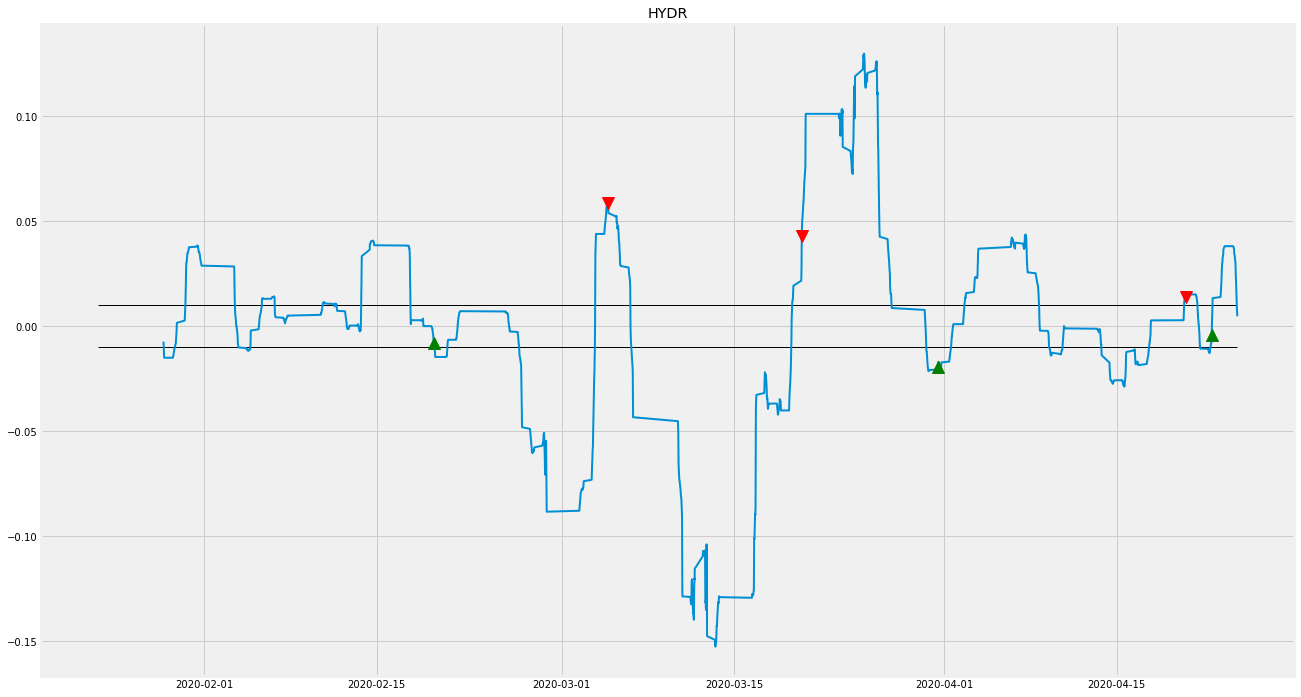

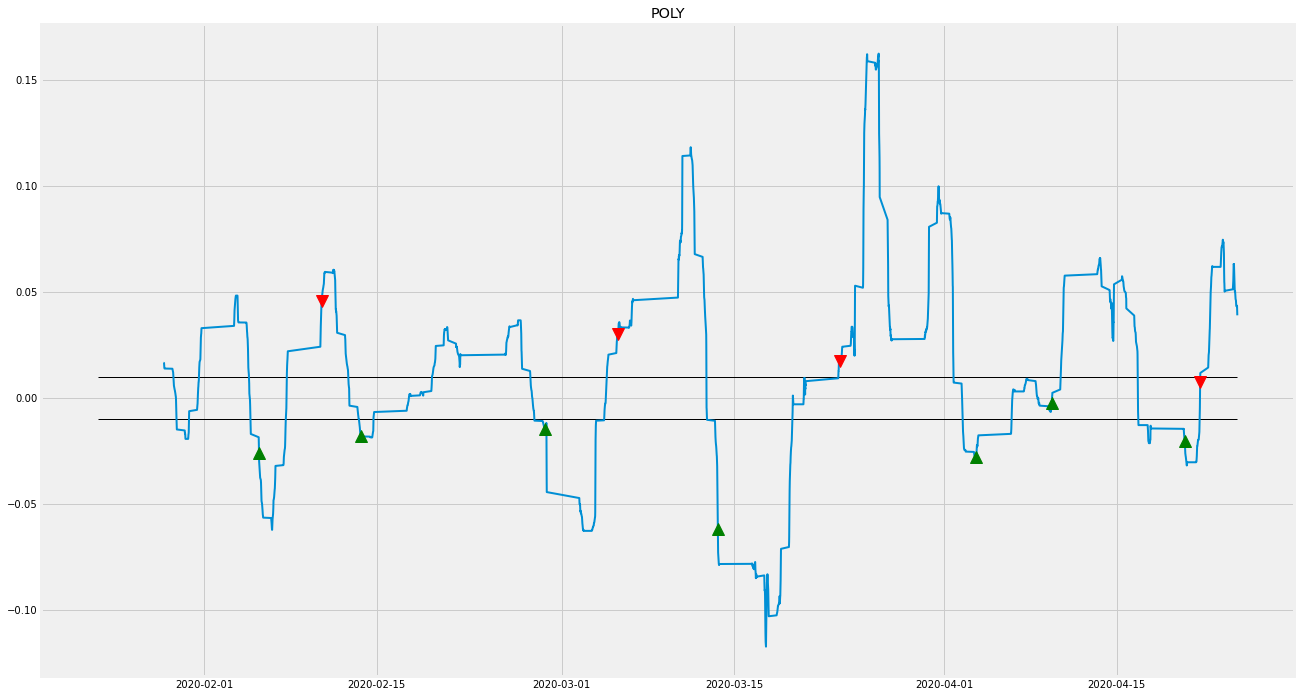

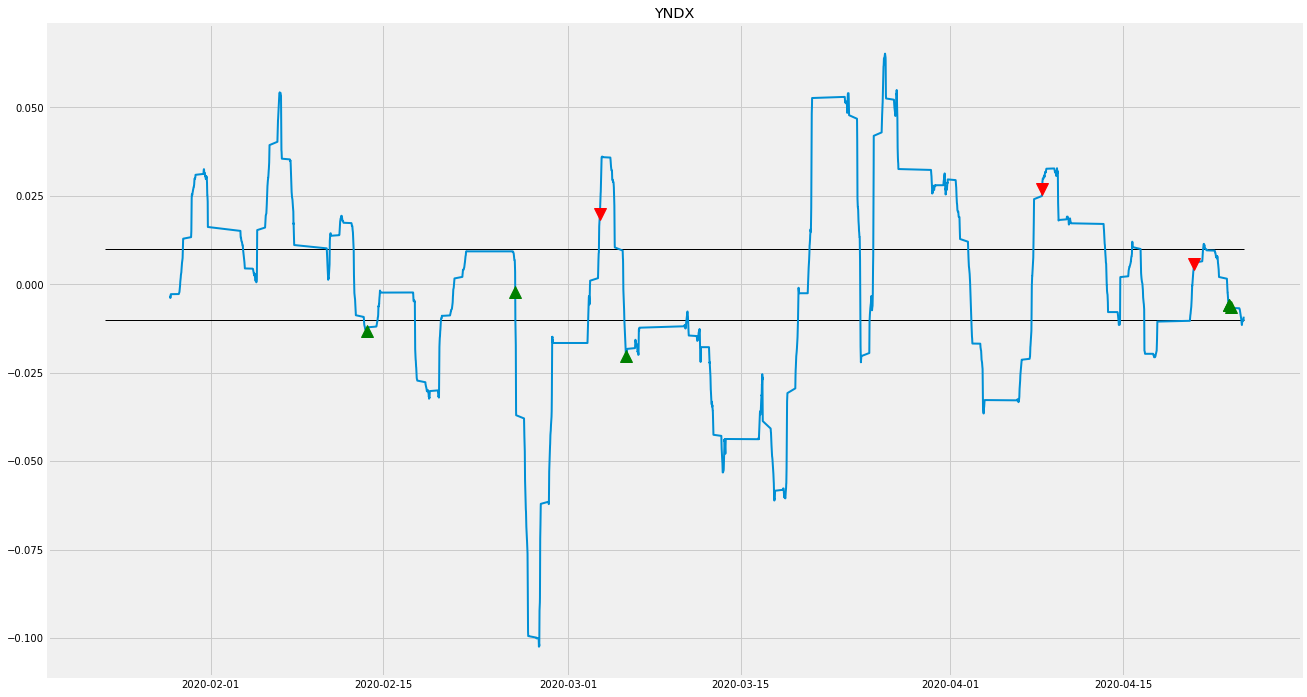

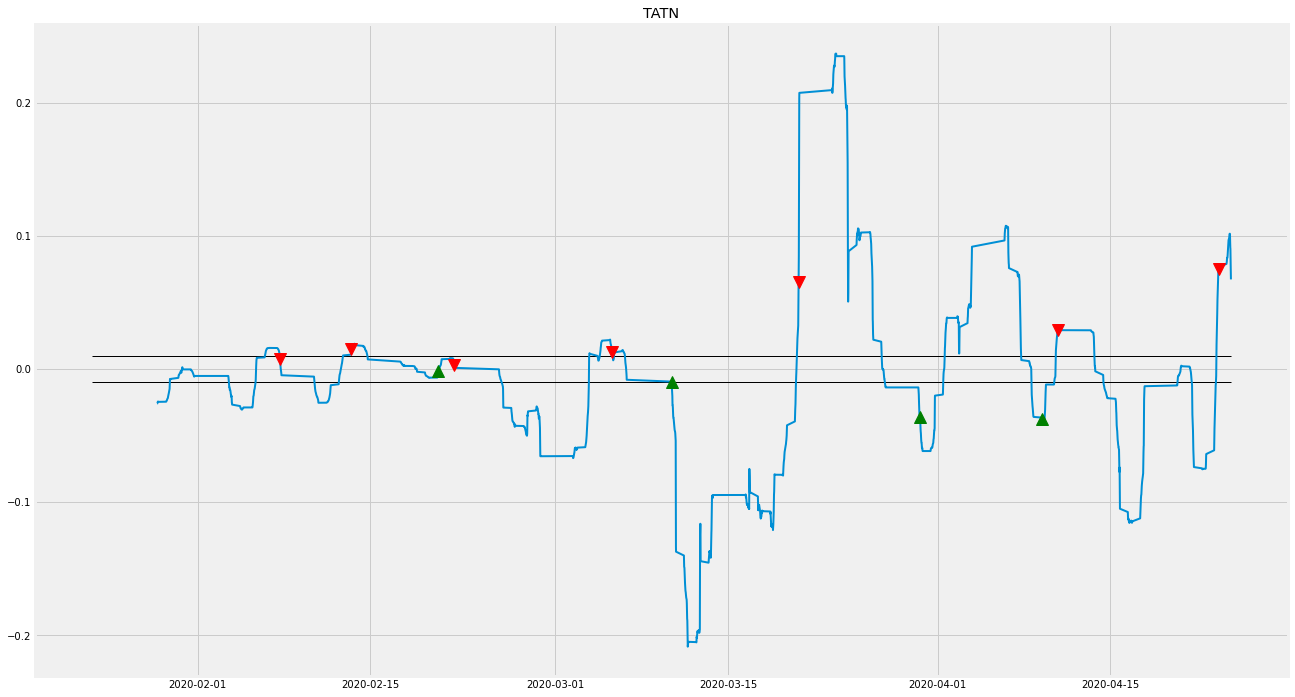

In [59]:
# График изменения ma_samp_fast_pct_change
for df_toll in list(df_dikt):
    fig, ax = plt.subplots()
    ax = pylab.subplot(1, 1, 1)
    ax.set_title(df_toll)
    ax.plot(df_dikt[df_toll].ma_samp_fast_pct_change.dropna(),linewidth=2)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'short')&(df_dikt[df_toll].SIGNAL == True)].ma_samp_fast_pct_change, 'rv', markersize=12)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'long')&(df_dikt[df_toll].SIGNAL == True)].ma_samp_fast_pct_change, 'g^', markersize=12)   
# Горизонтальные линии
    ax.hlines(pct_change, data_period_dick['stert'], data_period_dick['end'],linewidth=1)
    ax.hlines(-1*pct_change, data_period_dick['stert'], data_period_dick['end'],linewidth=1)

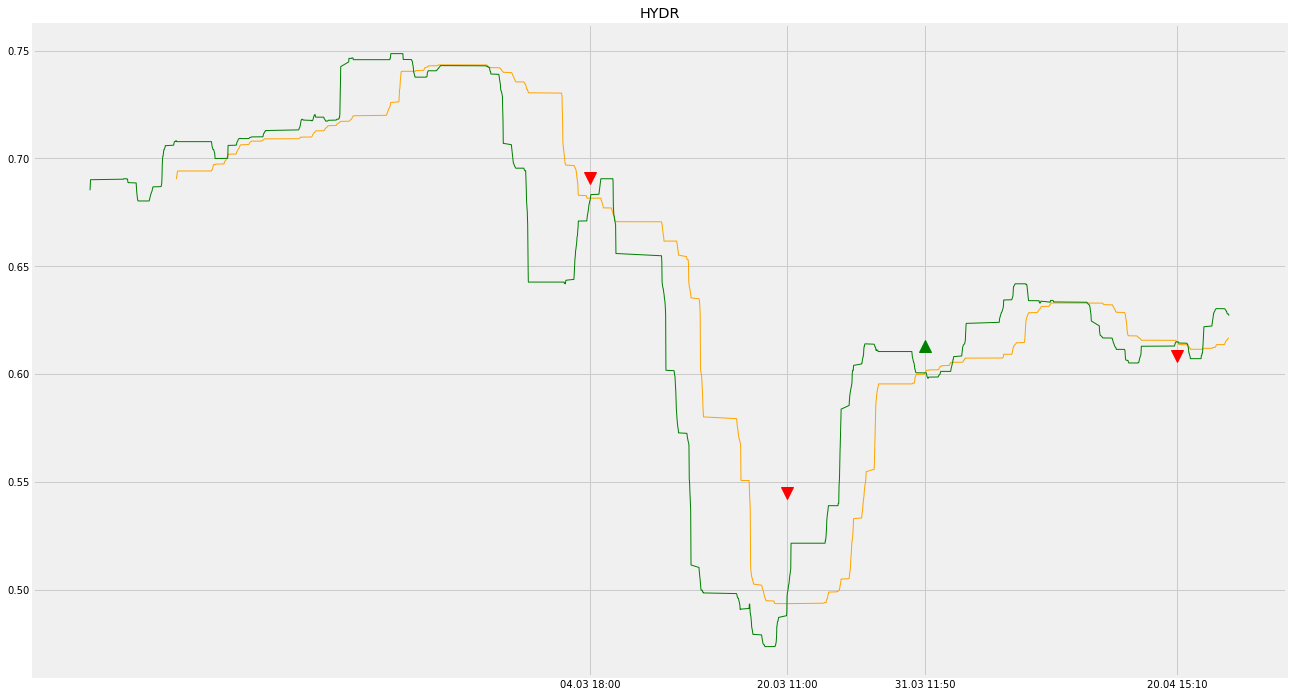

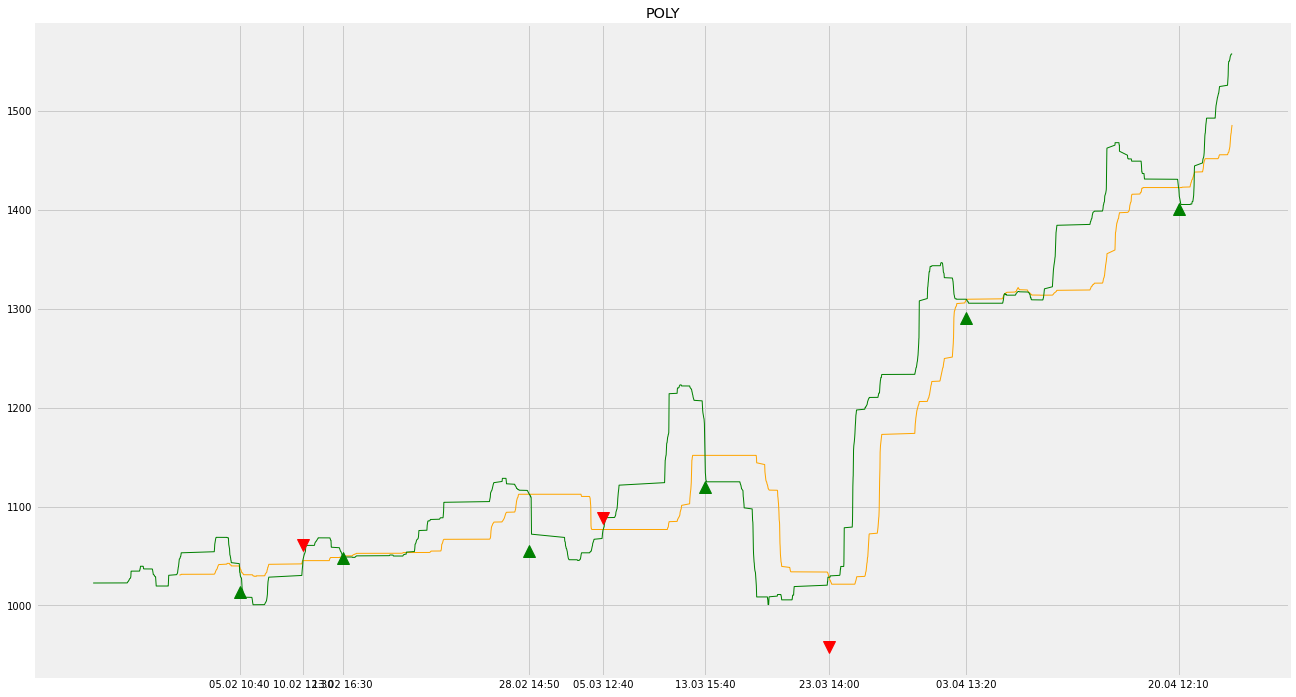

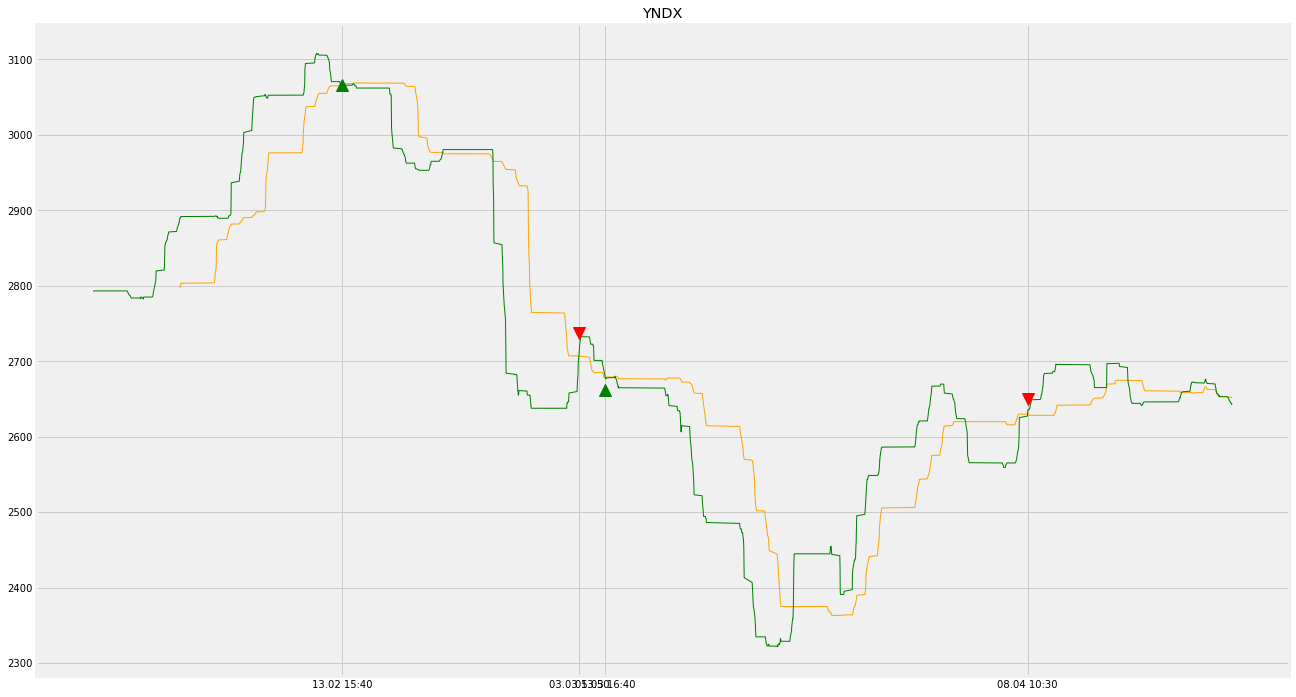

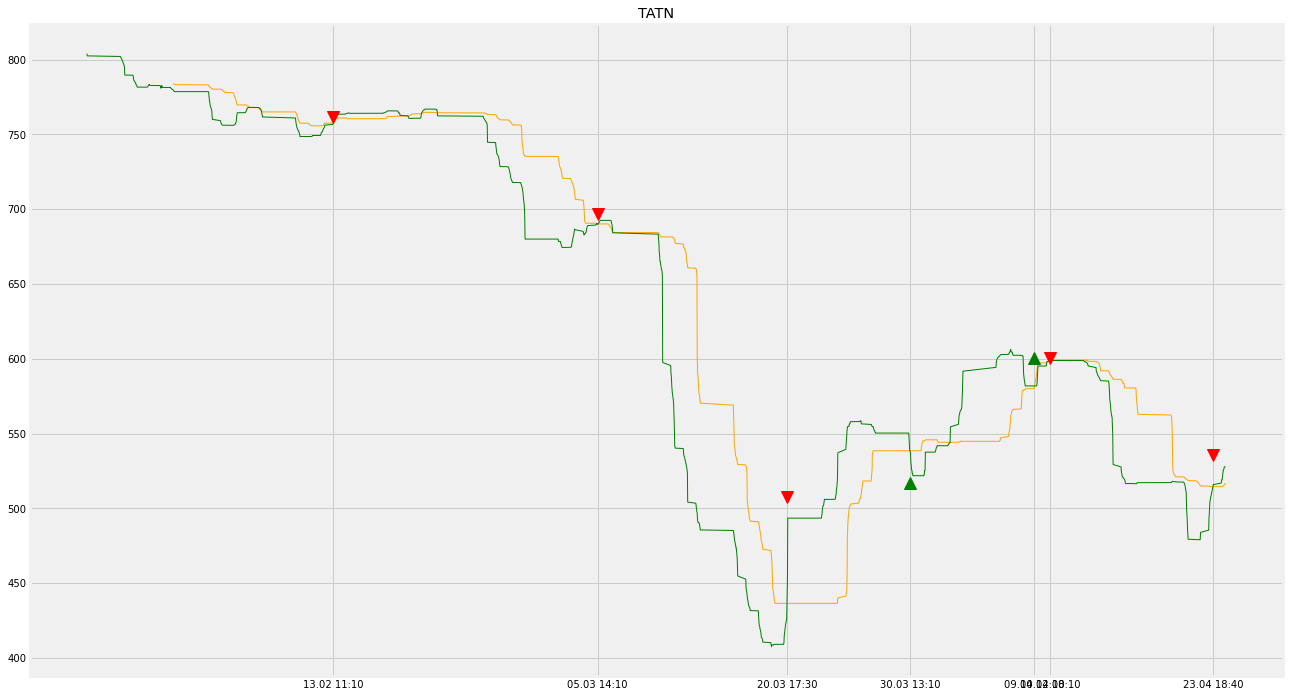

In [57]:
# График для торговли по пересечениям

for df_toll in list(df_dikt):
    fig, ax = plt.subplots()
# # Отрисовка свечного графика
#     for index in df_dikt[df_toll].loc[:,['OPEN']].resample(data_period_dick['step']).last().dropna().index:

#         data = index
#         Open = df_dikt[df_toll].loc[index,'OPEN']
#         Close  = df_dikt[df_toll].loc[index,'CLOSE']
#         High = df_dikt[df_toll].loc[index,'HIGH']
#         Low = df_dikt[df_toll].loc[index,'LOW']
#     #   Тело свечи
#         if Close >= Open: color='green'
#         else: color='red'
#         ax.plot([data,data],[Open,Close],color=color,lw = 3)
#         ax.plot([data,data],[High,Low],color=color,lw = 0.5)
#     axes.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
    ax = pylab.subplot(1, 1, 1)
    ax.set_title(df_toll)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m %H:%M'))
    plt.xticks(df_dikt[df_toll][df_dikt[df_toll].SIGNAL == True].index)
    ax.plot(df_dikt[df_toll].ma_samp_slow.dropna(),linewidth=1, color='orange')
    ax.plot(df_dikt[df_toll].ma_samp_fast.dropna(),linewidth=1, color='green')
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'short')&(df_dikt[df_toll].SIGNAL == True)].CLOSE, 'rv', markersize=12)
    ax.plot(df_dikt[df_toll][(df_dikt[df_toll].POZISION == 'long')&(df_dikt[df_toll].SIGNAL == True)].CLOSE, 'g^', markersize=12)
    plt.show()

## Визуализация тестирования

In [ ]:
# portfel_df_dict['POLY'][portfel_df_dict['POLY'].trade == 'sell']

In [ ]:
for tool in list(df_dikt):
    plt.title(tool)
    plt.plot(portfel_df_dict[tool].Portfel_vol.resample('D').last().dropna())
    plt.plot(portfel_df_dict[tool][portfel_df_dict[tool].trade == 'sell'].Portfel_vol, 'rv', markersize=12)
    plt.plot(portfel_df_dict[tool][portfel_df_dict[tool].trade == 'buy'].Portfel_vol, 'g^', markersize=12)
    # plt.axis([0, 6, 0, 20])
    plt.show()